In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
categorical_cols = df.select_dtypes(include={'object'}).columns
categorical_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [14]:
numerical_cols = df.select_dtypes(include={'number'}).columns
numerical_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [16]:
df[categorical_cols].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


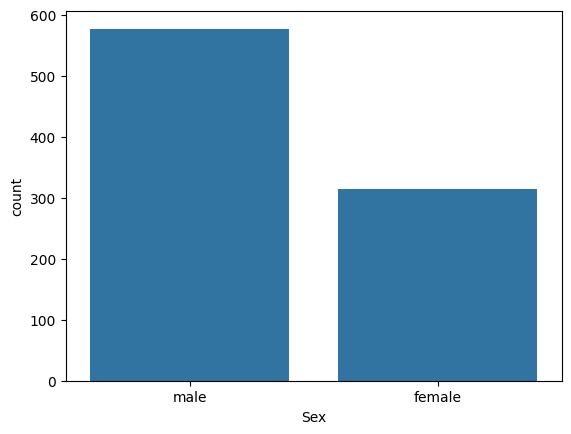

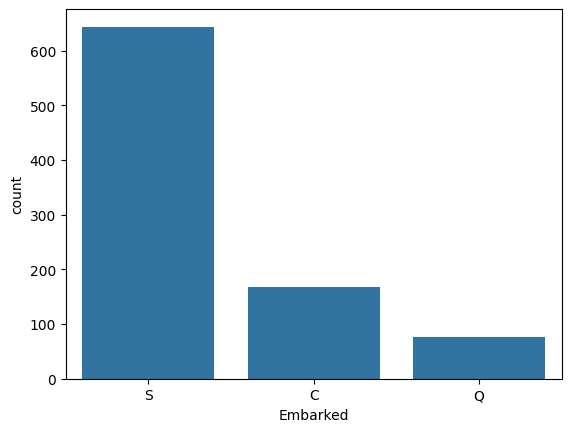

In [21]:
for col in ['Sex','Embarked']:
    sns.countplot(data=df, x=col)
    plt.show()

In [22]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
#data['Age'] = data['Age'].fillna(data['Age'].median())
#df = df.dropna(subset=['Age'], axis=0)

In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer

In [ ]:
data = df[['Age', 'Pclass', 'Sex', 'Fare', 'Embarked', 'SibSp', 'Parch']].copy()

In [28]:
from sklearn.preprocessing import LabelEncoder
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

In [ ]:
#data['Fare_log'] = np.log1p(data['Fare'])

In [29]:
# data = pd.get_dummies(data, columns = ['Embarked'],drop_first = True, dtype=int)

In [ ]:
# df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

In [31]:
df[['Age','Fare','Embarked']]

,Age,Fare,Embarked
0,22.0,7.2500,2
1,38.0,71.2833,0
2,26.0,7.9250,2
3,35.0,53.1000,2
4,35.0,8.0500,2
...,...,...,...
886,27.0,13.0000,2
887,19.0,30.0000,2
888,NaN,23.4500,2
889,26.0,30.0000,0


In [34]:
df[['Fare','Age']] = np.log1p(df[['Fare','Age']])


In [35]:
df[['Age','Fare','Embarked']]

,Age,Fare,Embarked
0,3.135494,1.134691,2
1,3.663562,1.664038,0
2,3.295837,1.159662,2
3,3.583519,1.607603,2
4,3.583519,1.164014,2
...,...,...,...
886,3.332205,1.291725,2
887,2.995732,1.489299,2
888,NaN,1.434282,2
889,3.295837,1.489299,0


In [37]:
from sklearn.impute import KNNImputer
df_knn = df[['Age','Fare','Embarked']].copy()

knn_imputer = KNNImputer(n_neighbors=5)

df_knn_imputed = knn_imputer.fit_transform(df_knn[['Fare','Embarked']])

df_knn['Age'] = df_knn_imputed[:,0]

In [38]:
df[['Age','Fare','Embarked']]

,Age,Fare,Embarked
0,3.135494,1.134691,2
1,3.663562,1.664038,0
2,3.295837,1.159662,2
3,3.583519,1.607603,2
4,3.583519,1.164014,2
...,...,...,...
886,3.332205,1.291725,2
887,2.995732,1.489299,2
888,NaN,1.434282,2
889,3.295837,1.489299,0


In [40]:
df['Age'].isnull().sum()

np.int64(177)

In [41]:
df_knn['Age'].isnull().sum()

np.int64(0)

In [42]:
df['Age']=df_knn['Age']

In [43]:
df['Age']

0      1.134691
1      1.664038
2      1.159662
3      1.607603
4      1.164014
         ...   
886    1.291725
887    1.489299
888    1.434282
889    1.489299
890    1.153433
Name: Age, Length: 891, dtype: float64